In [248]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

### Co-authorship

Growth process is as follows - at every step a new nodes connects with fixed edges $(m)$ to previously existing nodes using preferential attachment

### Citations 

We calculate the neighbors for a node at 1,2,3 distances in the co-authorship network. Every node makes $c$ citations using the following probabilities

$$\frac{C}{1^\alpha} \rightarrow \text{for immediate neighbors}$$

$$\frac{C}{2^\alpha} \rightarrow \text{for d=2}$$

$$\frac{C}{3^\alpha} \rightarrow \text{for d=3}$$

$$\frac{C}{N-1} \rightarrow \text{for rest}$$

$C$ is normalization constant and N is the total nodes in the network

In [403]:
class preferential_fixedM:
    
    def __init__(self,N,m):
        
        self.N = N
        self.m = m
    
    def grow_model(self,):
        
        G = nx.Graph()
        
        potential_targets = [0]
        G.add_node(0)
        
        for i in range(1,self.N):
            
            if i <= self.m:
                
                degree = len(G.nodes())
                
            else:
                degree = self.m
        
            targets = np.random.choice(potential_targets,degree)
            
            potential_targets.extend([i]*degree)
            potential_targets.extend(targets)
            G.add_edges_from(zip([i]*degree,targets))
        
        return G
    
    
    def potential_citations(self,G,n):
        
        d1 = list(nx.neighbors(G,n))
        
        d2 = [n2 for n1 in d1 for n2 in nx.neighbors(G,n1) if n2!=n and n2 not in d1]
        
        d3 = [n3 for n2 in d2 for n3 in nx.neighbors(G,n2) if n3 not in d2 and n3 not in d1]
        
        all_others = list(set(G.nodes()) - set(d1) - set(d2) - set(d3) - set({n}))
        
        return d1,d2,d3,all_others
    
    def grow_citation(self,G,alpha,c):
        
        Gc = nx.DiGraph()
        
        for source in G.nodes():
            
            d1,d2,d3,rest = self.potential_citations(G,source)
            
            all_targets = d1+d2+d3+rest
            
            p1 = [1/1**alpha]*len(d1)
            p2 = [1/2**alpha]*len(d2)
            p3 = [1/3**alpha]*len(d3)
            p4 = [1/(self.N-1)]*len(rest)
            
            prob = p1+p2+p3+p4
            
            prob = np.array(prob)/sum(prob)
            
            true_targets = np.random.choice(all_targets,c,p=prob)
            
            Gc.add_edges_from(zip([source]*c,true_targets))
        
        return Gc,prob

In [404]:
Gm = preferential_fixedM(2000,3)
Gr = Gm.grow_model()
# Gr1 = nx.barabasi_albert_graph(10,1)

Gc,prob = Gm.grow_citation(Gr,2,20)

In [405]:
# y = nx.degree_histogram(Gr)
# y1 = nx.degree_histogram(Gr1)

In [406]:
# plt.loglog(y,'-o')
# plt.loglog(y1,'-s')
# plt.xscale('log')

In [407]:
# plt.plot(y,'-o')
# plt.plot(y1,'-s')
# # plt.xscale('log')

In [408]:
# # Gr.remove_edge(0,3)
# # Gr.add_edge(0,6)
# # Gr.remove_edge(0,8)
# Gr.add_edge(10,11)
# d1 = list(nx.neighbors(Gr,0))
# print(d1)
# d2 = list(set([n for n1 in d1 for n in nx.neighbors(Gr,n1) if n != 0 and n not in d1]))
# print(d2)
# d3 = list(set([n3 for n2 in d2 for n3 in nx.neighbors(Gr,n2) if n3 not in d2 and n3 not in d1]))
# print(d3)

In [409]:
# nx.draw(Gc,with_labels=True)

In [410]:
Sp = dict(nx.all_pairs_shortest_path_length(Gr))

In [411]:
npairs = defaultdict(int)

for s in Gr.nodes():
    
    for t in Gr.nodes():
        
        npairs[Sp[s][t]]+=1

In [412]:
cit_dist = defaultdict(int)

for s,t in list(Gc.edges()):
    
    cit_dist[Sp[s][t]]+=1

In [413]:
npairs

defaultdict(int,
            {0: 2000,
             1: 11914,
             2: 180066,
             3: 1263476,
             4: 2138776,
             5: 402078,
             6: 1690})

In [414]:
x = [1,2,3,4,5,6]
y = [cit_dist[i]/npairs[i] for i in x]

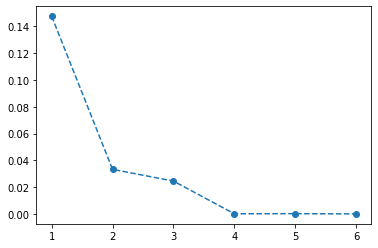

In [416]:
plt.plot(x,y,'--o')
# plt.yscale('log')

In [417]:
cit_dist

defaultdict(int, {3: 30984, 1: 1758, 2: 5989, 4: 251, 5: 77, 6: 0})